In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd'gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/DecisionTreeClassifier'

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/DecisionTreeClassifier


In [ ]:
#  from google.colab import drive
#  drive.mount('/content/gdrive')
#  %cd'gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/RandomForestClassifier'

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('baseline.csv')
test=data.copy()
test.head()

,st_no,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,serotype2,serology,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,1,13.0,Male,31.0,3,No,Yes,NaN,NaN,NaN,NaN,No,Yes,2.0,NaN,NaN,DENV-2,NaN,Yes,Yes,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,12.0,Female,37.0,2,Yes,Yes,Negative,38.0,100.0,100.0,No,No,0.0,38.0,184000.0,DENV-4,Possible primary,No,No,NaN,No,NaN,NaN,NaN,NaN,NaN
2,1002,11.0,Male,27.0,4,Yes,No,Positive,38.5,90.0,80.0,No,No,0.0,40.8,220000.0,DENV-1,Unclassifiable,No,No,NaN,No,140000.0,6.0,40.8,4.0,2.000000
3,1003,13.0,Male,20.0,3,Yes,No,Negative,38.0,100.0,90.0,No,No,0.0,39.3,91000.0,DENV-2,Secondary dengue,No,No,NaN,No,41400.0,4.0,45.7,4.0,12.839506
4,1004,11.0,Male,27.0,3,Yes,Yes,Negative,40.5,100.0,90.0,No,No,0.0,34.0,92000.0,DENV-2,Secondary dengue,No,No,NaN,Mucose,30000.0,6.0,45.9,6.0,14.750000


In [ ]:
data.info()
data=data.replace('NA',None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_no           2301 non-null   object 
 1   age             2300 non-null   float64
 2   sex             2301 non-null   object 
 3   wt              2296 non-null   float64
 4   day_ill         2301 non-null   int64  
 5   his_tired       2298 non-null   object 
 6   his_vomit       2295 non-null   object 
 7   ttest           2289 non-null   object 
 8   temp            2299 non-null   float64
 9   pulse           2297 non-null   float64
 10  sys_bp          2298 non-null   float64
 11  mucosal_bleed   2283 non-null   object 
 12  abdominal_pain  2291 non-null   object 
 13  liver           2279 non-null   float64
 14  hct_bsl         2259 non-null   float64
 15  plt_bsl         2258 non-null   float64
 16  serotype2       2152 non-null   object 
 17  serology        2271 non-null   o

In [ ]:
data.drop(['st_no', 'doi_shock'],axis='columns', inplace = True)

In [ ]:
conversion_parameters = ['sex' ,'his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','serotype2','serology','to_PICU','shock','bleed_hos']
data[conversion_parameters] = np.where(pd.isnull(data[conversion_parameters]),data[conversion_parameters],data[conversion_parameters].astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
df = data.copy()

In [ ]:
df[conversion_parameters] = df[conversion_parameters].astype("str").apply(en.fit_transform)
df = df.where(~data.isna(), data)
df

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,serotype2,serology,to_PICU,shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,1,31.0,3,0,1,NaN,NaN,NaN,NaN,0,1,2.0,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,0,37.0,2,1,1,1,38.0,100.0,100.0,0,0,0.0,38.0,184000.0,3,0,0,0,1,NaN,NaN,NaN,NaN,NaN
2,11.0,1,27.0,4,1,0,2,38.5,90.0,80.0,0,0,0.0,40.8,220000.0,0,3,0,0,1,140000.0,6.0,40.8,4.0,2.000000
3,13.0,1,20.0,3,1,0,1,38.0,100.0,90.0,0,0,0.0,39.3,91000.0,1,2,0,0,1,41400.0,4.0,45.7,4.0,12.839506
4,11.0,1,27.0,3,1,1,1,40.5,100.0,90.0,0,0,0.0,34.0,92000.0,1,2,0,0,0,30000.0,6.0,45.9,6.0,14.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,13.0,0,39.0,3,0,0,2,40.0,100.0,100.0,0,0,0.0,41.8,153000.0,3,2,0,0,1,102000.0,5.0,44.3,4.0,15.064935
2297,13.0,0,53.0,3,1,0,1,40.0,100.0,100.0,0,0,0.0,37.5,160000.0,0,2,0,0,1,88000.0,6.0,42.0,5.0,10.526316
2298,9.0,0,27.5,2,1,0,1,39.0,118.0,100.0,0,0,0.0,34.4,163000.0,1,3,0,0,1,120000.0,7.0,37.8,3.0,8.000000
2299,10.0,0,33.0,4,1,1,1,39.9,100.0,100.0,0,0,0.0,37.5,75000.0,5,2,0,0,1,75000.0,4.0,43.0,5.0,16.216216


In [ ]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df[labels].unique())

sex :  [1 0]
his_tired :  [0 1 nan]
his_vomit :  [1 0 nan]
ttest :  [nan 1 2 0]
mucosal_bleed :  [0 1 nan]
abdominal_pain :  [1 0 nan]
serotype2 :  [1 3 0 5 2 nan 4]
serology :  [nan 0 3 2 1]
to_PICU :  [1 0]
shock :  [1 0]
bleed_hos :  [nan 1 0 3 2]


Filling up the missing value with KNN Imputer

In [ ]:
# importing the KNN from fancyimpute library 
from fancyimpute import KNN 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# calling the KNN class 
knn_imputer = KNN() 
# imputing the missing value with knn imputer 
arr_knn= knn_imputer.fit_transform(df) 


Imputing row 1/2301 with 13 missing, elapsed time: 1.084
Imputing row 101/2301 with 0 missing, elapsed time: 1.086
Imputing row 201/2301 with 0 missing, elapsed time: 1.088
Imputing row 301/2301 with 0 missing, elapsed time: 1.089
Imputing row 401/2301 with 0 missing, elapsed time: 1.092
Imputing row 501/2301 with 0 missing, elapsed time: 1.094
Imputing row 601/2301 with 0 missing, elapsed time: 1.095
Imputing row 701/2301 with 0 missing, elapsed time: 1.096
Imputing row 801/2301 with 2 missing, elapsed time: 1.097
Imputing row 901/2301 with 0 missing, elapsed time: 1.099
Imputing row 1001/2301 with 0 missing, elapsed time: 1.100
Imputing row 1101/2301 with 0 missing, elapsed time: 1.101
Imputing row 1201/2301 with 0 missing, elapsed time: 1.102
Imputing row 1301/2301 with 0 missing, elapsed time: 1.103
Imputing row 1401/2301 with 0 missing, elapsed time: 1.104
Imputing row 1501/2301 with 0 missing, elapsed time: 1.105
Imputing row 1601/2301 with 0 missing, elapsed time: 1.105
Imputing

In [ ]:
df_knn = pd.DataFrame(data=arr_knn,columns= df.columns)
                    
df_knn.head()

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,serotype2,serology,to_PICU,shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,1.0,31.0,3.0,0.0,1.0,1.475871,38.920689,100.196392,99.576166,0.0,1.0,2.0,39.541293,113925.305498,1.0,1.682753,1.0,1.0,1.289415,42806.098807,6.545637,49.697765,5.546672,26.030252
1,12.0,0.0,37.0,2.0,1.0,1.0,1.000000,38.000000,100.000000,100.000000,0.0,0.0,0.0,38.000000,184000.000000,3.0,0.000000,0.0,0.0,1.000000,52179.739551,5.424670,44.886037,4.865776,16.097823
2,11.0,1.0,27.0,4.0,1.0,0.0,2.000000,38.500000,90.000000,80.000000,0.0,0.0,0.0,40.800000,220000.000000,0.0,3.000000,0.0,0.0,1.000000,140000.000000,6.000000,40.800000,4.000000,2.000000
3,13.0,1.0,20.0,3.0,1.0,0.0,1.000000,38.000000,100.000000,90.000000,0.0,0.0,0.0,39.300000,91000.000000,1.0,2.000000,0.0,0.0,1.000000,41400.000000,4.000000,45.700000,4.000000,12.839506
4,11.0,1.0,27.0,3.0,1.0,1.0,1.000000,40.500000,100.000000,90.000000,0.0,0.0,0.0,34.000000,92000.000000,1.0,2.000000,0.0,0.0,0.000000,30000.000000,6.000000,45.900000,6.000000,14.750000


In [ ]:
df_knn = df_knn.astype(int)

In [ ]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} = Before : {df[labels].unique()} \t After : {df_knn[labels].unique()}')

sex = Before : [1 0] After : [1 0]
his_tired = Before : [0 1 nan] After : [0 1]
his_vomit = Before : [1 0 nan] After : [1 0]
ttest = Before : [nan 1 2 0] After : [1 2 0]
mucosal_bleed = Before : [0 1 nan] After : [0 1]
abdominal_pain = Before : [1 0 nan] After : [1 0]
serotype2 = Before : [1 3 0 5 2 nan 4] After : [1 3 0 5 2 4]
serology = Before : [nan 0 3 2 1] After : [1 0 3 2]
to_PICU = Before : [1 0] After : [1 0]
shock = Before : [1 0] After : [1 0]
bleed_hos = Before : [nan 1 0 3 2] After : [1 0 3 2]


Decision Tree Classifier

age,sex,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,to_picu,bleed_hos,shock

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','to_PICU','bleed_hos']
X=df_knn[feature_cols]
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X.shape

(2301, 16)

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[645  12]
 [  2  32]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

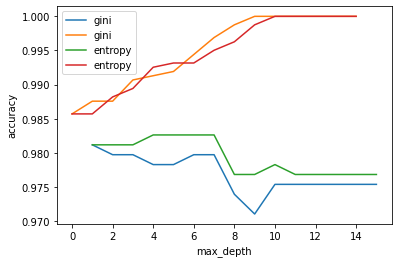

In [ ]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,16):
  
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

'age','sex','hct_bsl','plt_bsl','serotype2','serology','to_PICU','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8'


In [ ]:
feature_cols =['age','sex','hct_bsl','plt_bsl','serotype2','serology','to_PICU','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']
X=df_knn[feature_cols]
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[649   8]
 [  6  28]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

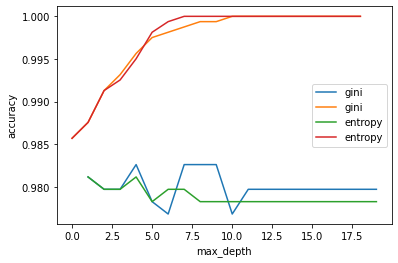

In [ ]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,16):
  
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Applying Decision Tree taking the whole datasets

In [ ]:
X=df_knn.copy()
X.drop(['shock'],axis='columns', inplace = True)
y=df_knn.shock


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[644  13]
 [  0  34]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       657
           1       0.72      1.00      0.84        34

    accuracy                           0.98       691
   macro avg       0.86      0.99      0.91       691
weighted avg       0.99      0.98      0.98       691

MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[649   8]
 [  6  28]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

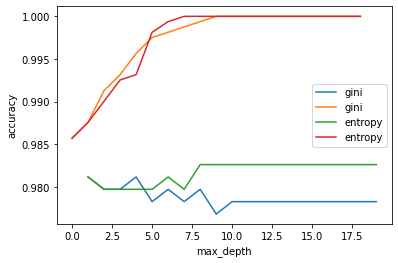

In [ ]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,20):
  
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Whole datasets dropping to_PICU only

In [ ]:
X=df_knn.copy()
X.drop(['shock','to_PICU'],axis='columns', inplace = True)
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[652   5]
 [ 29   5]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       657
           1       0.33      0.35      0.34        34

    accuracy                           0.93       691
   macro avg       0.65      0.66      0.65       691
weighted avg       0.94      0.93      0.93       691

MAX DEPTH:  8
CONFUSION MATRIX GINI: 
[[633  24]
 [ 22  12]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       657
           1       0.33      0.35      0.34        34

    accuracy                           0.93       691
   macro avg       0.65      0.66      0.65       691
weighted avg       0.94      0.93      0.93       691

MAX DEPTH:  8
CONFUSION MATRIX ENTROPY: 
[[638  19]
 [ 24  10]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       657
           1       0.34      0.29      0.32        

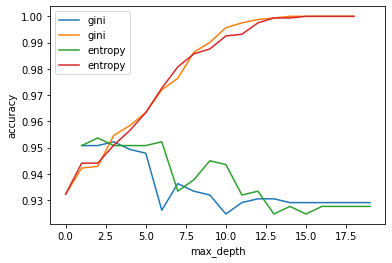

In [ ]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,20):
  
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter='best',random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Max depth =8 Criterion=Entropy Without to_PICU and whole datsets

Finding Important Features

In [ ]:
X=df_knn.copy()
X.drop(['shock','to_PICU'],axis='columns', inplace = True)
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=16,splitter='best',random_state=1)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
pred1=dtree.predict(X_train)
print("Test Accuracy ",accuracy_score(y_test, pred))
print("Training Accuracy ",accuracy_score(y_train,pred1))



Test Accuracy  0.9276410998552822
Training Accuracy  1.0


In [ ]:
#Feature Importance
#featuredCols=X.columns.tolist()
feature_cols1=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']
feature_imp = pd.Series(dtree.feature_importances_,index=featureCols1).sort_values(ascending=False)
feature_imp

NameError: ignored

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
cm_df

In [ ]:
# # Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces    TP = conf_matrix[1][1]
# TP = cm[1][1]
# TN = cm[0][0]
# FP = cm[0][1]
# FN = cm[1][0]  
# print('True Positives:', TP)
# print('True Negatives:', TN)
# print('False Positives:', FP)
# print('False Negatives:', FN)
    
#     # calculate accuracy
# conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
#     # calculate mis-classification
# conf_misclassification = 1- conf_accuracy
    
#     # calculate the sensitivity
# conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
# conf_specificity = (TN / float(TN + FP))
    
#     # calculate precision
# conf_precision = (TN / float(TN + FP))    # calculate f_1 score
# conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
# print('-'*50)
# print(f'Accuracy: {round(conf_accuracy,2)}') 
# print(f'Mis-Classification: {round(conf_misclassification,2)}') 
# print(f'Sensitivity: {round(conf_sensitivity,2)}') 
# print(f'Specificity: {round(conf_specificity,2)}') 
# print(f'Precision: {round(conf_precision,2)}')
# print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
# # Calculating class probabilities
# pred_proba = [i[1] for i in dtree.predict_proba(X_test)]
# # pred_df = pd.DataFrame({'true_values': y_test,
#                         'pred_probs':pred_proba})

In [ ]:
# # Create figure.
# plt.figure(figsize = (10,7))

In [ ]:
# # Create threshold values. 
# thresholds = np.linspace(0, 1, 1000)

In [ ]:
# # Define function to calculate sensitivity. (True positive rate.)
# def TPR(df, true_col, pred_prob_col, threshold):
#     true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
#     false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
#     return true_positive / (true_positive + false_negative)

In [ ]:
# # Define function to calculate 1 - specificity. (False positive rate.)
# def FPR(df, true_col, pred_prob_col, threshold):
#     true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
#     false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
#     return 1 - (true_negative / (true_negative + false_positive))
    

In [ ]:
# # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
# tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

In [ ]:
# # Plot ROC curve.
# plt.plot(fpr_values, # False Positive Rate on X-axis
#          tpr_values, # True Positive Rate on Y-axis
#          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
# plt.plot(np.linspace(0, 1,200),
#          np.linspace(0, 1,200),
#          label='baseline',
#          linestyle='--')# Label axes.
# plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
# plt.ylabel('Sensitivity', fontsize=18)
# plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
# plt.legend(fontsize=16);